## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aaron\AppData\Roa

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:

from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
        input_layer = keras.layers.Input(input_shape)

        for i, n_units in enumerate(num_neurons):
            if i == 0:
                x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1), 
                               kernel_regularizer=l1(l1_ratio))(input_layer)
            else:
                x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1),
                               kernel_regularizer=l1(l1_ratio))(x)

        out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

        model = keras.models.Model(inputs=[input_layer], outputs=[out])
        return model
        

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with Regulizer = 0.010000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.w

50000/50000 [==============================] - 7s 141us/step - loss: 2.4626 - acc: 0.0973 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.4626 - acc: 0.0999 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.4626 - acc: 0.0985 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 14s 272us/step - loss: 2.4626 - acc: 0.0977 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 18s 353us/step - loss: 2.4626 - acc: 0.0979 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.4626 - acc: 0.0970 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 47/50
50000/50000 [============

50000/50000 [==============================] - 7s 140us/step - loss: 3.0117 - acc: 0.6032 - val_loss: 3.2092 - val_acc: 0.5231
Epoch 42/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.9573 - acc: 0.6095 - val_loss: 3.2655 - val_acc: 0.5082
Epoch 43/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.9165 - acc: 0.6106 - val_loss: 3.2687 - val_acc: 0.4930
Epoch 44/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.8774 - acc: 0.6126 - val_loss: 3.0965 - val_acc: 0.5323
Epoch 45/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.8333 - acc: 0.6152 - val_loss: 3.0597 - val_acc: 0.5298
Epoch 46/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.7921 - acc: 0.6160 - val_loss: 2.9937 - val_acc: 0.5414
Epoch 47/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.7575 - acc: 0.6187 - val_loss: 2.9705 - val_acc: 0.5373
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 7s 139us/step - loss: 0.9718 - acc: 0.6586 - val_loss: 1.3607 - val_acc: 0.5345
Epoch 43/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.9595 - acc: 0.6630 - val_loss: 1.4014 - val_acc: 0.5253
Epoch 44/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.9477 - acc: 0.6660 - val_loss: 1.3565 - val_acc: 0.5304
Epoch 45/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.9357 - acc: 0.6716 - val_loss: 1.3651 - val_acc: 0.5263
Epoch 46/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.9258 - acc: 0.6751 - val_loss: 1.4293 - val_acc: 0.5197
Epoch 47/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.9114 - acc: 0.6804 - val_loss: 1.3703 - val_acc: 0.5373
Epoch 48/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.9050 - acc: 0.6838 - val_loss: 1.3978 - val_acc: 0.5262
Epoch 49/50
50000/50000 [==============

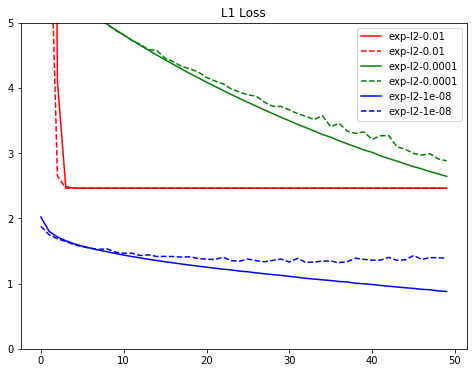

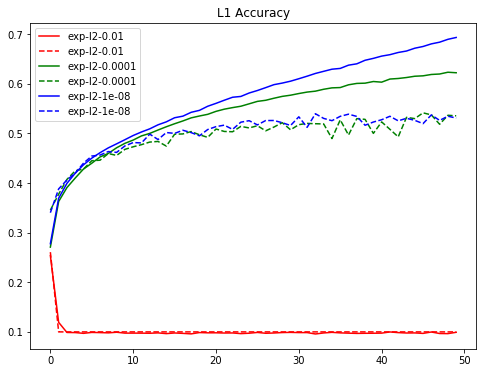

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("L1 Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("L1 Accuracy")
plt.legend()
plt.show()